In [1]:
!git clone https://huggingface.co/datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification
!git clone https://github.com/angiegh2002/nlp_hw

Cloning into 'Arabic_Dialect_Identification'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33 (from 1)
Unpacking objects: 100% (33/33), 6.47 KiB | 413.00 KiB/s, done.
Cloning into 'nlp_hw'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 176 (delta 15), reused 5 (delta 5), pack-reused 160 (from 1)
Receiving objects: 100% (176/176), 13.73 MiB | 6.28 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [2]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install gensim
!pip install fasttext
!pip install wordcloud

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286.8/286.8 kB 4.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296189 sha256=6084902ea37f70b4a9b7239c06e6a7f9c8c024b8980eed67ed3bb6ff40bf2d2b
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


#[ÿ•ŸÜÿ¨Ÿä ÿ∫ÿ®Ÿäÿ≥ - ÿØÿßŸÜÿß ŸÉŸÑÿ¥ ]

<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [3]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud
import regex,re
import os
import json
import nltk
from nltk.tokenize import  wordpunct_tokenize,TweetTokenizer
from nltk import FreqDist, bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import fasttext
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, balanced_accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load data

<h2 dir="rtl">ŸÖÿ´ÿßŸÑ ÿπŸÜ ŸÉŸäŸÅŸäÿ© ÿ™ŸÜÿ∏ŸäŸÖ ÿ≠ŸÑŸàŸÑ ÿßŸÑÿ∑ŸÑÿ®ÿßÿ™:

ŸÇŸÖ ÿ®Ÿàÿ∂ÿπ ÿßŸÑÿÆŸÑÿßŸäÿß ÿßŸÑÿ£ÿ±ÿ®ÿπ ÿßŸÑÿ™ÿßŸÑŸäÿ© ŸÑÿ≠ŸÑ ŸÉŸÑ ÿ∑ŸÑÿ®</h2>


<div dir="rtl">ÿ¥ÿ±ÿ≠ ŸÖÿß ŸäŸÇŸàŸÖ ÿ®Ÿá ÿßŸÑŸÉŸàÿØ (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ŸÉ ŸÅŸä ÿ≠ÿßŸÑ Ÿàÿ¨ŸàÿØŸáÿß</div>
<div dir="rtl">ŸäŸÖŸÉŸÜŸÉ ÿ•ÿ∂ÿßŸÅÿ© ÿÆŸÑÿßŸäÿß ŸÑŸÉŸÑ ÿ∑ŸÑÿ® ÿ®ŸÇÿØÿ± ŸÖÿß ÿ™ÿ¥ÿßÿ°ÿå ÿßŸÑŸÖŸáŸÖ ÿ£ŸÜ ÿ™ÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ÿ™ŸÜÿ∏ŸäŸÖ ÿßŸÑŸÖŸÑŸÅ</div>

# ŸÖŸáŸÖÿ© 01  : ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

## [1.1]

In [5]:
MADAR_dir="/content/nlp_hw/MADAR_Corpus"
# MADAR_dir="MADAR_Corpus"
MADAR_file_path=[os.path.join(MADAR_dir,filename) for filename in os.listdir(MADAR_dir) if filename.endswith(".tsv")]
df = [pd.read_csv(Mfilepath, sep='\t') for Mfilepath in MADAR_file_path ]
MADAR_df=pd.concat(df)
MADAR_df=MADAR_df.drop_duplicates().dropna()
has_nan=MADAR_df.isnull().sum().any()

In [6]:
MADAR_trian_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-train'] ,MADAR_df[MADAR_df['split'] == 'corpus-6-train']])
MADAR_vaild_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-dev'],MADAR_df[MADAR_df['split'] == 'corpus-6-dev']])
MADAR_test_df= MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-test']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(MADAR_df),len(MADAR_trian_df),len(MADAR_vaild_df),len(MADAR_test_df)))

number of samples : 112000 
number of trian samples : 95600 
number of vaild samples : 11200
number of test samples :5200


In [7]:
MADAR_df.head(10)

sentID.BTEC                          split lang  \
0            5  corpus-6-test-corpus-26-train  SAN   
1            9  corpus-6-test-corpus-26-train  SAN   
2           11  corpus-6-test-corpus-26-train  SAN   
3           26  corpus-6-test-corpus-26-train  SAN   
4           27  corpus-6-test-corpus-26-train  SAN   
5           30  corpus-6-test-corpus-26-train  SAN   
6           50  corpus-6-test-corpus-26-train  SAN   
7           64  corpus-6-test-corpus-26-train  SAN   
8           74  corpus-6-test-corpus-26-train  SAN   
9           86  corpus-6-test-corpus-26-train  SAN   

                                                sent  
0  ŸáŸàÿ∞ÿßŸÉ ŸáÿßŸÜÿßŸÉÿå ŸÇÿ®ÿßŸÑ ŸÖŸÉÿ™ÿ® ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ŸäŸá ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.  
1                 ŸÖÿßŸÇÿØ ÿ≥ŸÖÿπÿ™ÿ¥ ÿßÿ®ÿØÿß ÿ®Ÿáÿ∞ÿß ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáÿßŸÜÿß.  
2                       ÿßŸÖÿ¥Ÿä ÿ∑ŸàÿßŸÑŸä ŸÑŸàŸÖÿß ÿ™ÿ®ÿ≥ÿ± ÿµŸäÿØŸÑŸäŸá.  
3                                     ÿ®ŸÉŸÖ ŸáŸà ÿßŸÑÿµÿ®Ÿàÿ≠ÿü  
4                                   ŸÉŸäŸÅ ÿßŸÇÿØÿ± ÿßÿ≥ÿßÿπÿØŸÉÿü  
5                        ÿßÿÆÿ∑Ÿâ Ÿäÿ≥ÿßÿ± ÿπŸÜÿØ ÿßŸÑÿ±ŸÉŸÜ ÿßŸÑÿ´ÿßŸÑÿ´.  
6                         ÿ™ÿ¥ÿ™Ÿä ŸÉÿ±ŸäŸÖŸá Ÿàÿ≥ŸÉÿ± ŸÅŸä ÿßŸÑŸÇŸáŸàÿ©ÿü  
7                  ÿ™ŸÇÿØÿ± ÿ™ÿµÿ±ŸÅ ŸÑŸä ÿ¥ŸäŸÉ ÿßŸÑŸÖŸäÿ™ŸäŸÜ ÿßŸÑÿØŸàŸÑÿßÿ±ÿü  
8                    ÿßÿ∞ÿß ŸÑÿßÿ≤ŸÖ Ÿäÿ∏Ÿáÿ±ÿå ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ ÿßÿ™ÿµŸÑ ŸÑŸä.  
9                                    ÿßŸäŸÜ ŸáŸà ÿßŸÑŸÉÿßŸÅŸäŸáÿü

In [8]:
QADI_dir="/content/Arabic_Dialect_Identification/data"
# QADI_dir="Arabic_Dialect_Identification/data"
file_labels = [ "test","trian","valid"]
QADI_file_path=[os.path.join(QADI_dir,filename) for filename in os.listdir(QADI_dir)]
frames = [pd.read_parquet(Qfilepath).assign(split=label) for Qfilepath, label in zip(QADI_file_path, file_labels)]
QADI_df=pd.concat(frames)
label_mapping = {
    0: 'OM', 1: 'SD', 2: 'SA', 3: 'KW', 4: 'QA', 5: 'LB',
    6: 'JO', 7: 'SY', 8: 'IQ', 9: 'MA', 10: 'EG',
    11: 'PL', 12: 'YE', 13: 'BH', 14: 'DZ', 15: 'AE',
    16: 'TN', 17: 'LY'
}
QADI_df['label'] = QADI_df['label'].map(label_mapping)
QADI_df=QADI_df.drop_duplicates().dropna()
has_nan=QADI_df.isnull().sum().any()

In [9]:
QADI_trian_df=QADI_df[QADI_df['split'] == 'trian']
QADI_test_df=QADI_df[QADI_df['split'] == 'test']
QADI_vaild_df=QADI_df[QADI_df['split'] == 'valid']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(QADI_df),len(QADI_trian_df),len(QADI_vaild_df),len(QADI_test_df)))

number of samples : 458197 
number of trian samples : 440052 
number of vaild samples : 9164
number of test samples :8981


In [10]:
QADI_df.head(10)

id label  \
0  1159906099585327104    EG   
1   950123809608171648    DZ   
2  1091295506960142336    SA   
3  1179845110718181376    DZ   
4  1011983655546302464    EG   
5  1163125327318704128    QA   
6  1097560483303997440    OM   
7   988460473912705024    PL   
8   949396064821481600    OM   
9   938545640891613184    QA   

                                                text split  
0  ÿßŸäŸá ÿßŸÑÿÆŸäÿ®ÿ© Ÿà ÿßŸÑŸáÿ±ÿ™ŸÑÿ© ŸÇÿØÿßŸÖ ÿßŸÑÿ¨ŸàŸÜ ÿØŸàŸÑÿüÿü ü§™üò≤\nÿßŸÑÿπŸä...  test  
1         @FIA_WIS ÿ™ÿ∞ŸÉÿ±ÿ™ ŸÖÿß ÿßÿ≥ŸÖŸä ÿπÿßÿ¶ÿ¥ÿ© ÿßŸÜÿß ÿßÿ≥ŸÖŸä ÿÆŸàŸÑÿ©  test  
2  @showqiy @3nood_mh ŸÑÿß ŸàÿßŸÑŸÑŸá ŸÜÿ±Ÿàÿ≠ ŸÜÿ¥ÿ¨ÿπ ŸÇÿ∑ÿ± Ÿà ŸÜŸÅ...  test  
3                 @espoir_dz1 Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÇŸÑÿ®ŸÉ ŸàŸÑÿØ ŸÖÿØŸäŸÜÿ™Ÿä  test  
4  ŸÖŸÑÿÆÿµ ŸÖÿ§ÿ™ŸÖÿ± ÿ£ÿ®Ÿà ÿ≥ÿ®Ÿàÿ®ÿ©ÿå ŸÇÿµÿØŸä ÿ£ÿ®Ÿà ÿ±ŸäÿØÿ©....ÿßÿ≠ŸÜÿß ÿπŸÖ...  test  
5  @VJSdI48K5DnXaX9 ŸäÿßŸÑŸäÿ™ ÿ™ÿ±ŸÉÿ≤ ÿ£ŸÇÿµÿØ ÿßŸÑÿ≥Ÿäÿßÿ≠Ÿäÿ© ÿßŸÑÿØÿß...  test  
6  ÿ£ÿπÿ™ŸÇÿØ ÿßŸÜÿ≠ÿ≥ ÿ•ÿ≥ÿ®Ÿàÿπ ŸÖÿ± ÿ®ÿ≠Ÿäÿßÿ™Ÿä ÿå ŸÖÿ±ÿ™ŸäŸÜ ÿßŸÑÿ≥Ÿäÿßÿ±Ÿá ÿ™ŸàŸÇ...  test  
7  ÿ™ÿ≤ŸÉÿ±ÿ™ ÿ®ÿ≥ ŸáÿØŸäŸÉ ÿßŸÑŸÖÿ±Ÿá ÿ®ÿ™ÿ≠ŸÑÿ∑ŸÖ ŸÑŸÉ ÿπ ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑŸä ŸÖÿπŸä ...  test  
8  @Omantel ŸäÿßÿÆŸÑŸÅÿßŸÜ ŸäÿßŸÑŸÑŸä ÿ®ÿπŸÖÿßŸÜÿ™ŸÑ ŸáÿØŸÇÿ™ŸÜÿß ÿ®ŸÜŸÅÿ≥ ÿßŸÑÿπ...  test  
9  @asool10201 @AlsaeedFajer Ÿäÿßÿ¥ŸäÿÆ ÿπŸÇŸÑŸÉ ŸÅŸä ÿ¨Ÿàÿ™Ÿä ÿß...  test

## [1.2]

In [11]:
class_criteria_df=pd.read_csv("/content/nlp_hw/dialect_name_unification.csv")
# class_criteria_df=pd.read_csv("dialect_name_unification.csv")
class_criteria_df = class_criteria_df.drop(labels = ["Unnamed: 0"], axis = 1)
class_criteria_df=class_criteria_df.drop(index=[0,1],axis=0)
class_criteria_df.head()

Region Unnamed: 2 Unnamed: 3  Country Unnamed: 5 Unnamed: 6     City  \
2  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         MA  Morocco     ÿßŸÑŸÖÿ∫ÿ±ÿ®        RAB    Rabat   
3  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         MA  Morocco     ÿßŸÑŸÖÿ∫ÿ±ÿ®        FES      Fes   
4  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         DZ  Algeria    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±        ALG  Algiers   
5  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         DZ  Algeria    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±        ANB   Annaba   
6  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         TN  Tunisia       ÿ™ŸàŸÜÿ≥        TUN    Tunis   

  Unnamed: 8  
2     ÿßŸÑÿ±ÿ®ÿßÿ∑  
3        ŸÅÿßÿ≥  
4    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±  
5      ÿπŸÜÿßÿ®ÿ©  
6       ÿ™ŸàŸÜÿ≥

In [12]:
MADAR_df_merged=MADAR_df.merge(class_criteria_df,left_on="lang",right_on="Unnamed: 6",how="left")
MADAR_df_merged = MADAR_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City"], axis = 1)
MADAR_df_merged.rename(columns={"Unnamed: 5" :"Country","Unnamed: 8" :"City","Unnamed: 2" :"Region"},inplace=True)
MADAR_df_merged=MADAR_df_merged.drop_duplicates().dropna()
has_nan=MADAR_df_merged.isna().any().any()
# MADAR_df_merged.to_csv("dd.csv",index=False)
print("number of samples :",len(MADAR_df_merged))
# MADAR_df_merged.head(10)

number of samples : 112000


In [13]:
QADI_df_merged=QADI_df.merge(class_criteria_df,left_on="label",right_on="Unnamed: 3",how="left")
QADI_df_merged = QADI_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City","Unnamed: 8"], axis = 1)
QADI_df_merged.rename(columns={"text" :"sent","Unnamed: 5" :"Country","Unnamed: 2" :"Region"},inplace=True)

QADI_df_merged=QADI_df_merged.drop_duplicates().dropna()
has_nan=QADI_df_merged.isna().any().any()
print("number of samples :",len(QADI_df_merged))
# QADI_df_merged.head(10)

number of samples : 458197


## [1.3]

In [14]:
excluded_columns = ['sentID.BTEC',"lang"]
excluded_columns1 = ['id','label']
MADAR_df_filtered = MADAR_df_merged.drop(columns=excluded_columns, errors='ignore')
QADI_df__filtered = QADI_df_merged.drop(columns=excluded_columns1, errors='ignore')
data_df = pd.concat([MADAR_df_filtered, QADI_df__filtered], ignore_index=True)

In [15]:
data_trian_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-train'] ,data_df[data_df['split'] == 'corpus-6-train'],data_df[data_df['split'] == 'trian']])
data_vaild_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-dev'],data_df[data_df['split'] == 'corpus-6-dev'],data_df[data_df['split'] == 'valid']])
data_test_df= pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-test'],data_df[data_df['split'] == 'test']])
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(data_df),len(data_trian_df),len(data_vaild_df),len(data_test_df)))

number of samples : 570197 
number of trian samples : 535652 
number of vaild samples : 20364
number of test samples :14181


In [16]:
data_df.head(10)

split  \
0  corpus-6-test-corpus-26-train   
1  corpus-6-test-corpus-26-train   
2  corpus-6-test-corpus-26-train   
3  corpus-6-test-corpus-26-train   
4  corpus-6-test-corpus-26-train   
5  corpus-6-test-corpus-26-train   
6  corpus-6-test-corpus-26-train   
7  corpus-6-test-corpus-26-train   
8  corpus-6-test-corpus-26-train   
9  corpus-6-test-corpus-26-train   

                                                sent Region Country   City  
0  ŸáŸàÿ∞ÿßŸÉ ŸáÿßŸÜÿßŸÉÿå ŸÇÿ®ÿßŸÑ ŸÖŸÉÿ™ÿ® ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ŸäŸá ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
1                 ŸÖÿßŸÇÿØ ÿ≥ŸÖÿπÿ™ÿ¥ ÿßÿ®ÿØÿß ÿ®Ÿáÿ∞ÿß ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáÿßŸÜÿß.   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
2                       ÿßŸÖÿ¥Ÿä ÿ∑ŸàÿßŸÑŸä ŸÑŸàŸÖÿß ÿ™ÿ®ÿ≥ÿ± ÿµŸäÿØŸÑŸäŸá.   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
3                                     ÿ®ŸÉŸÖ ŸáŸà ÿßŸÑÿµÿ®Ÿàÿ≠ÿü   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
4                                   ŸÉŸäŸÅ ÿßŸÇÿØÿ± ÿßÿ≥ÿßÿπÿØŸÉÿü   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
5                        ÿßÿÆÿ∑Ÿâ Ÿäÿ≥ÿßÿ± ÿπŸÜÿØ ÿßŸÑÿ±ŸÉŸÜ ÿßŸÑÿ´ÿßŸÑÿ´.   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
6                         ÿ™ÿ¥ÿ™Ÿä ŸÉÿ±ŸäŸÖŸá Ÿàÿ≥ŸÉÿ± ŸÅŸä ÿßŸÑŸÇŸáŸàÿ©ÿü   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
7                  ÿ™ŸÇÿØÿ± ÿ™ÿµÿ±ŸÅ ŸÑŸä ÿ¥ŸäŸÉ ÿßŸÑŸÖŸäÿ™ŸäŸÜ ÿßŸÑÿØŸàŸÑÿßÿ±ÿü   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
8                    ÿßÿ∞ÿß ŸÑÿßÿ≤ŸÖ Ÿäÿ∏Ÿáÿ±ÿå ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ ÿßÿ™ÿµŸÑ ŸÑŸä.   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°  
9                                    ÿßŸäŸÜ ŸáŸà ÿßŸÑŸÉÿßŸÅŸäŸáÿü   ŸäŸÖŸÜŸä   ÿßŸÑŸäŸÖŸÜ  ÿµŸÜÿπÿßÿ°

# ŸÖŸáŸÖÿ© 02 : ŸÅŸáŸÖ Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

EDA

## [2.1]


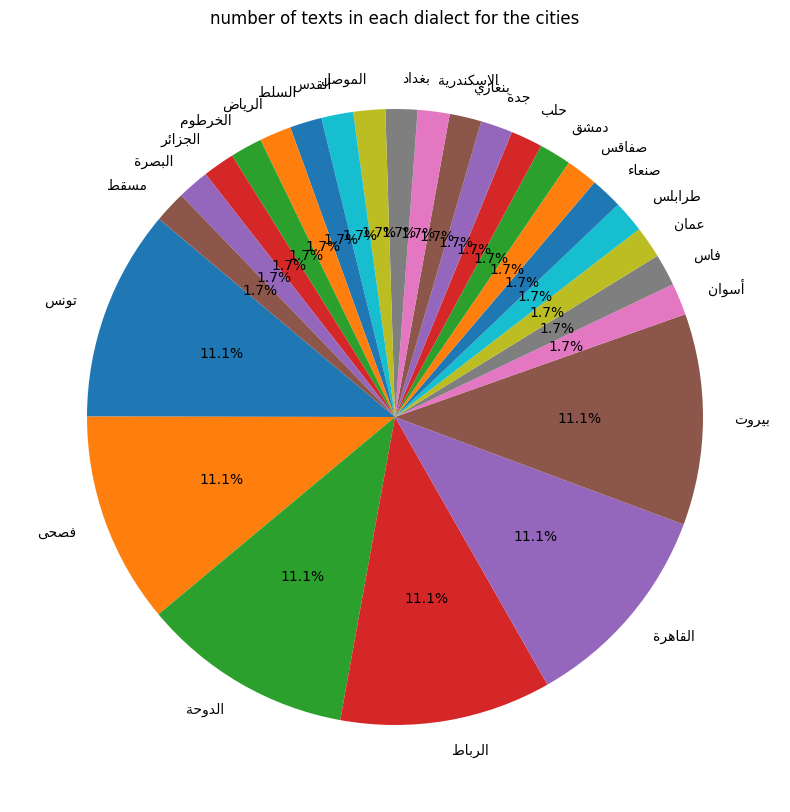

In [ ]:
city_counts = data_trian_df.groupby('City')['sent'].count()
city_counts = city_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(city)) for city in city_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the cities")
plt.show()

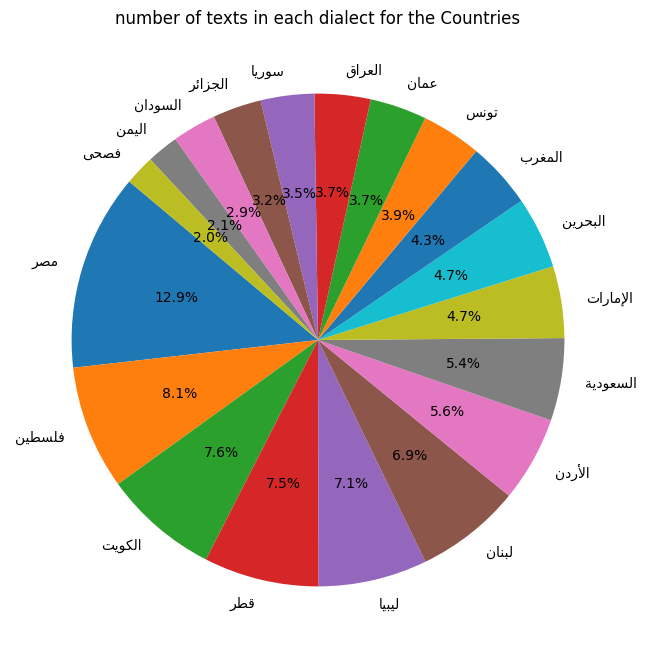

In [ ]:
country_counts = data_trian_df.groupby('Country')['sent'].count()
country_counts = country_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(country)) for country in country_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Countries")
plt.show()

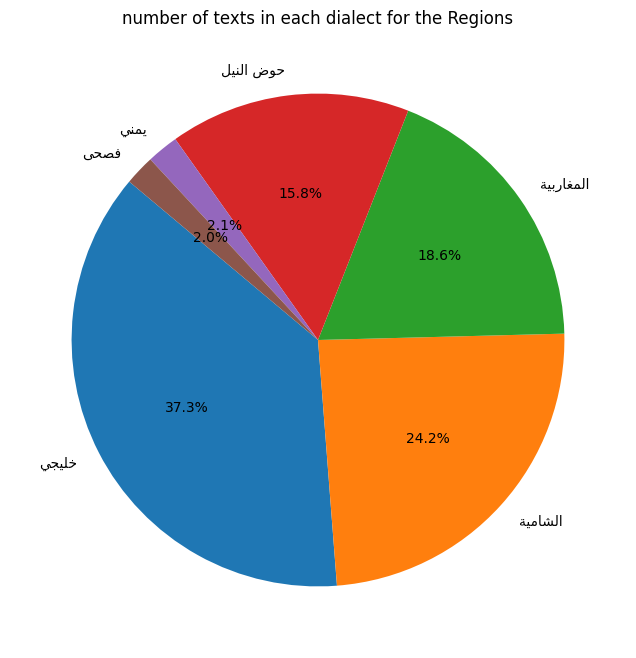

In [ ]:
region_counts = data_trian_df.groupby('Region')['sent'].count()
region_counts = region_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Regions")
plt.show()

<div dir="rtl">
ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ :<br>
ÿ≠ÿ≥ÿ® ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ (regions):<br>
- ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿÆŸÑŸäÿ¨Ÿäÿ© (glof) ÿ™ÿ≠ÿ™ŸàŸä ÿßŸÉÿ®ÿ± ŸÜÿ≥ÿ®ÿ© ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ŸÅŸä ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ 34.3% .<br>
-ŸáŸÜÿßŸÉ ŸÜŸÇÿµ ÿ®ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ŸÖÿ´ŸÑ ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸäŸÖŸÜŸä (yemen) ŸÅŸä ÿßŸÑÿØÿßÿ™ÿß .<br>
-ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∫ÿ±ÿ®ŸäŸëÿ© ŸàŸÖŸÜÿ∑ŸÇÿ© ÿ≠Ÿàÿ∂ ÿßŸÑŸÜŸäŸÑ ŸÑÿØŸäŸáÿß ŸÜÿ≥ÿ® ŸÖÿ™ŸÇÿßÿ±ÿ®ÿ© ÿ®ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿ∂ŸÖŸÜ ÿßŸÑÿØÿßÿ™ÿß .<br>
ÿ≠ÿ≥ÿ® ÿßŸÑÿ®ŸÑÿßÿØ (countries):<br>
- ÿ®ŸÑÿØ ŸÑŸäÿ®Ÿäÿß ŸáŸä ÿßŸÑÿßŸÉÿ´ÿ± ŸÖÿ≥ÿßŸáŸÖÿ© ÿ®ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿ∂ŸÖŸÜ ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®ŸäŸäÿ© ÿåÿßŸÖÿß ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ÿ≠Ÿàÿ∂ ÿßŸÑŸÜŸäŸÑ ŸÅÿπÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿ®ŸÑÿØ ŸÖÿµÿ± ŸáŸä ÿßŸÑÿßŸÉÿ´ÿ± ÿåŸàŸÅŸä ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ¥ÿßŸÖŸäŸäÿ© ÿ™ÿπÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿßŸÑŸÑÿ®ŸÜÿßŸÜ ŸàŸÅŸÑÿ≥ÿ∑ŸäŸÜ ÿßŸÑÿßŸÉÿ´ÿ± ÿπÿØÿØÿß ÿåŸàÿßÿÆŸäÿ±ÿß ŸÅŸä ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿÆŸÑŸäÿ¨Ÿäÿ© ÿßŸÑÿπÿØÿØ ÿßŸÑÿßŸÉÿ®ÿ± ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ŸäŸàÿ¨ÿØ ŸÅŸä ÿ®ŸÑÿØ ÿßŸÑŸÉŸàŸäÿ™ ŸàŸÇÿ∑ÿ± .<br>
- ÿ®ŸÑÿØ ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ± ŸàÿπŸÖÿßŸÜ ŸäŸÖŸÑŸÉÿßŸÜ ÿπÿØÿØÿß ÿµÿ∫Ÿäÿ±ÿß ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ÿπŸÑŸâ ÿßŸÑÿ±ÿ∫ŸÖ ŸÖŸÜ ÿßŸÜÿ™ŸÖÿßÿ°ŸáŸÖ ÿßŸÑŸâ ŸÖŸÜÿ∑ŸÇÿ™ŸäŸÜ ÿ®ÿπÿØÿØ ŸÜÿµŸàÿµ ŸÉÿ®Ÿäÿ± ŸÜÿ≥ÿ®Ÿäÿß .<br>
ÿ≠ÿ≥ÿ® ÿßŸÑŸÖÿØŸÜ (cities) <br>
-ÿßŸÑŸÜÿµŸàÿµ ŸÑŸäÿ≥ÿ™ ŸÖŸàÿ≤ÿπÿ© ÿ®ÿßŸÑÿ™ÿ≥ÿßŸàŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿØŸÜ ÿ≠Ÿäÿ´ ŸäŸàÿ¨ÿØ Ÿ• ÿØŸàŸÑ ŸÅŸÇÿ∑ ÿ®ÿπÿØÿØ ŸÜÿµŸàÿµ ÿßŸÉÿ®ÿ± ÿßŸÖÿß ÿ®ŸÇŸäÿ© ÿßŸÑŸÖÿØŸÜ ŸÅÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÅŸäŸáÿß ÿµÿ∫Ÿäÿ± .<br>
ŸÖŸÖÿß ÿ≥ÿ®ŸÇ Ÿàÿ¨ÿØŸÜÿß ÿßŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ÿ∏Ÿáÿ± ÿ™ÿ±ŸÉŸäÿ≤ÿß ŸÅŸä ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÖÿØŸÜ ŸÖŸÖÿß Ÿäÿ¥Ÿäÿ± ÿßŸÑŸâ ÿ™Ÿàÿ≤ÿπ ÿ∫Ÿäÿ± ŸÖÿ™ÿ≥ÿßŸà .<br>
ÿßŸÑÿßÿ≠ÿ∏ ÿßŸäÿ∂ÿß ÿßŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÅŸä ÿØÿßÿ™ÿß ŸÖÿØÿßÿ± ÿ∫Ÿäÿ± ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ŸÅŸÇÿØ ÿ∏Ÿáÿ± ÿ∞ŸÑŸÉ ŸÅŸä ÿ™ŸÖÿ´ŸÑ ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÑŸÉŸÑ ŸÖÿØŸäŸÜÿ© ÿ®ŸäŸÜŸÖÿß ŸÉÿßŸÜ ŸáŸÜÿßŸÉ ÿ™Ÿàÿßÿ≤ŸÜ ŸÜŸàÿπÿß ŸÖÿß ÿπŸÜÿØ ÿ™ŸÖÿ´ŸäŸÑ ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿπŸÑŸâ  ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿ®ŸÑÿßÿØ ÿßŸà ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ÿ≠Ÿäÿ´ ÿßŸÜ ÿØÿßÿ™ÿß ŸÉÿßÿØŸä ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ŸÜŸàÿπÿß ŸÖÿß ŸÑÿ∞ŸÑŸÉ ÿπŸÜÿØ ÿßÿ∂ÿßŸÅÿ™Ÿáÿß ŸÖÿπ ŸÖÿØÿßÿ± ŸÇŸÑ ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏  <br>
</div>

## [2.2]

In [ ]:
def tokenize(text):
    tokens = wordpunct_tokenize(text)
    # arabic_tokens = [token for token in tokens if regex.match(r"^\p{IsArabic}+$", token)]
    return tokens

data_trian_df['tokens'] = data_trian_df['sent'].apply(tokenize)

all_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))

print(f"ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÉŸÑŸä (Total Tokens): {total_tokens}")
print(f"ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÅÿ±ŸäÿØÿ© (Vocab Tokens): {unique_tokens}")


ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÉŸÑŸä (Total Tokens): 8466370
ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÅÿ±ŸäÿØÿ© (Vocab Tokens): 739865


In [ ]:
data_trian_df.head()

split  \
3   corpus-6-test-corpus-26-train   
4   corpus-6-test-corpus-26-train   
5   corpus-6-test-corpus-26-train   
14  corpus-6-test-corpus-26-train   
15  corpus-6-test-corpus-26-train   

                                            sent     Region Country    City  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   

                                               tokens  
3   [ÿ±ÿßŸá, ÿ™ŸÖÿß, ÿå, ŸÖŸÇÿßÿ®ŸÑ, ŸÖŸÉÿ™ÿ®, ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™, ÿßŸÑÿ≥Ÿäÿßÿ≠, ...  
4            [ŸÖÿß, ÿπŸÖÿ±Ÿä, ÿ≥ŸÖÿπÿ™, ŸáÿßÿØ, ÿßŸÑÿπŸÜŸàÿßŸÜ, ŸáŸÜÿßŸäÿß, .]  
5                  [ÿ≥Ÿäÿ±, ŸÜŸäÿ¥ÿßŸÜ, ÿ≠ÿ™ÿß, ÿ™ÿ¥ŸàŸÅ, ÿµŸäÿØŸÑŸäÿ©, .]  
14                        [ÿ¥ÿ≠ÿßŸÑ, ŸÉÿß, ŸäÿØŸäÿ±, ÿßŸÑŸÅÿ∑Ÿàÿ±, ÿü]  
15                           [ŸÉŸäŸÅÿßÿ¥, ŸÜŸÇÿØÿ±, ŸÜÿπÿßŸàŸÜŸÉ, ÿü]

## [2.3]

In [ ]:
# ÿπÿ∏

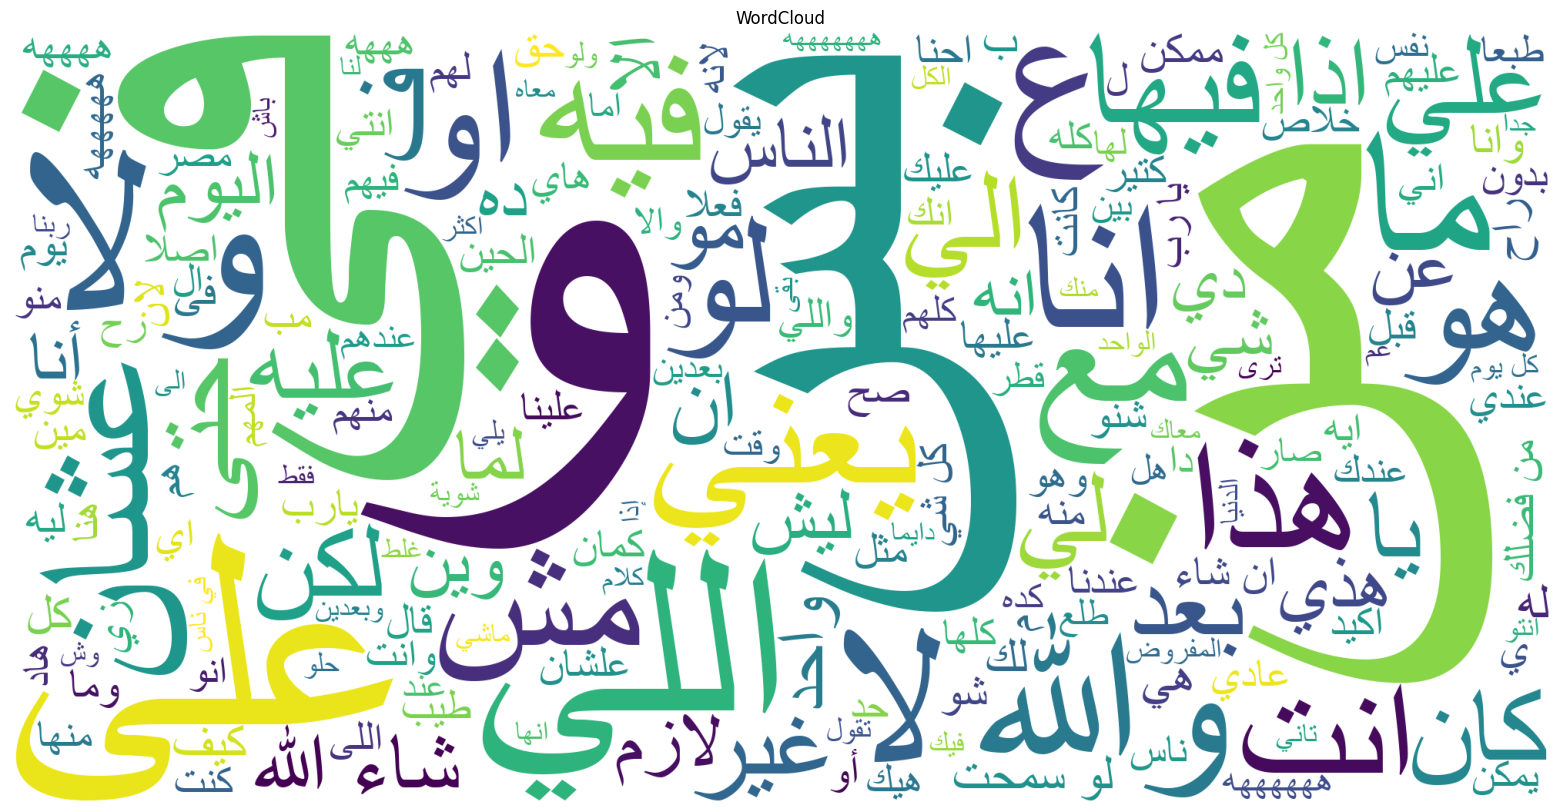

In [ ]:
data = ' '.join(all_tokens)

reshaped_text = arabic_reshaper.reshape(data)

processed_data = get_display(reshaped_text)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(processed_data)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


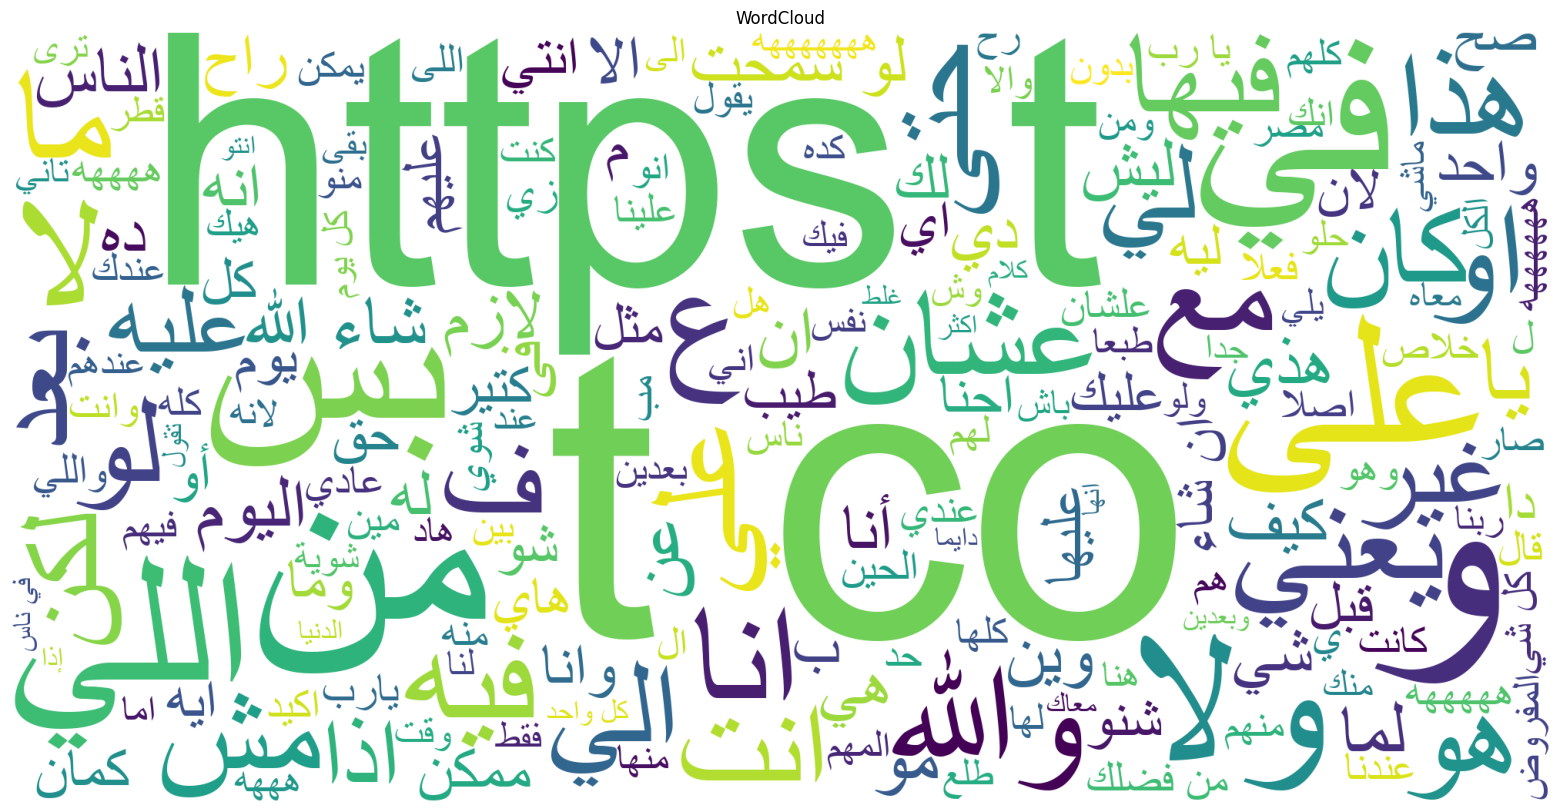

In [ ]:
arabic_tokens = []
other_tokens = []
def is_arabic(text):
    return regex.match(r"^\p{IsArabic}+$", text) is not None
for token in all_tokens:
    if is_arabic(token):
        arabic_tokens.append(token)
    else:
        other_tokens.append(token)

arabic_text = ' '.join(arabic_tokens)
reshaped_text = arabic_reshaper.reshape(arabic_text)
processed_arabic_text = get_display(reshaped_text)

final_text = processed_arabic_text + ' ' + ' '.join(other_tokens)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(final_text)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

# plt.figure(figsize=(20, 10))
# plt.title("WordCloud")
# plt.imshow(wordcloud)
# plt.axis("off")
# wordcloud_path = "wordcloud_output1.png"  # ÿßÿ≥ŸÖ ŸÖŸÑŸÅ ÿßŸÑÿµŸàÿ±ÿ©
# plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')  # ÿßŸÑÿ≠ŸÅÿ∏ ÿ®ÿ¨ŸàÿØÿ© ÿπÿßŸÑŸäÿ©
# plt.show()
# print(f"ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ŸÅŸä: {wordcloud_path}")


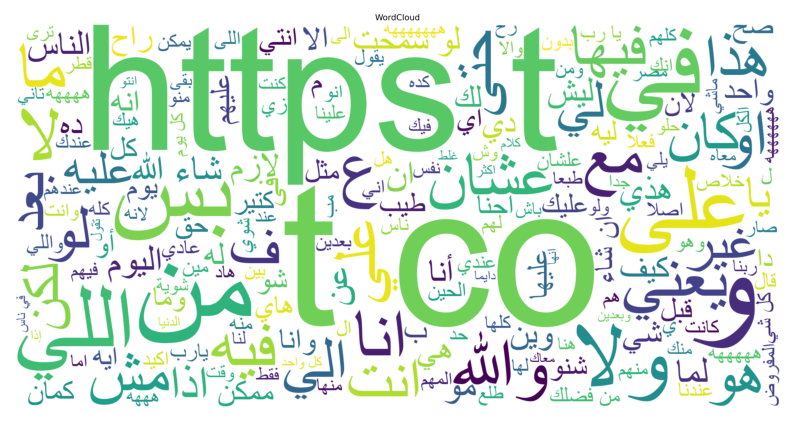

In [ ]:
img = plt.imread("wordcloud_output1.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÖÿ≠ÿßŸàÿ±
plt.show()

## [2.4]

In [ ]:
def get_most_common_words(tokens, n=10):
    """Return the n most common words."""
    word_freq = FreqDist(tokens)
    return word_freq.most_common(n)

def get_hapaxes(tokens, n=10):
    """Return the first n hapaxes (words that appear only once)."""
    word_freq = FreqDist(tokens)
    hapaxes = [word for word in word_freq.hapaxes()]
    return hapaxes[:n]

def get_most_common_bigrams(tokens, n=10):
    """Return the n most common bigrams."""
    bigram_freq = FreqDist(bigrams(tokens))
    return bigram_freq.most_common(n)

def get_most_common_trigrams(tokens, n=10):
    """Return the n most common trigrams."""
    trigram_freq = FreqDist(trigrams(tokens))
    return trigram_freq.most_common(n)

def get_most_important_bigrams(tokens, n=10):
    """Return the n most important bigrams using PMI."""
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    return bigram_finder.nbest(BigramAssocMeasures().pmi, n)

def get_most_important_trigrams(tokens, n=10):
    """Return the n most important trigrams using PMI."""
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    return trigram_finder.nbest(TrigramAssocMeasures().pmi, n)


In [ ]:
def analyze_texts(dataframe, column='City', n=10):
    """Analyze texts and print results for each city."""
    city_tokens = {}

    # ÿ™ÿ¨ŸÖŸäÿπ ÿ¨ŸÖŸäÿπ ÿßŸÑŸÜÿµŸàÿµ ŸÑŸÉŸÑ ŸÖÿØŸäŸÜÿ©
    for index, row in dataframe.iterrows():
        label = row[column]
        tokens = row['tokens']
        if pd.isna(label):
            continue
        if label not in city_tokens:
            city_tokens[label] = []
        city_tokens[label].extend(tokens)

    # ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ ŸÑŸÉŸÑ ŸÖÿØŸäŸÜÿ©
    for city, tokens in city_tokens.items():
        most_common = get_most_common_words(tokens, n)
        hapaxes = get_hapaxes(tokens, n)
        most_common_bigrams = get_most_common_bigrams(tokens, n)
        most_common_trigrams = get_most_common_trigrams(tokens, n)
        most_important_bigrams = get_most_important_bigrams(tokens, n)
        most_important_trigrams = get_most_important_trigrams(tokens, n)

        # ÿ∑ÿ®ÿßÿπÿ© ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÑŸÉŸÑ ŸÖÿØŸäŸÜÿ©
        print(f"=== Results for {city} ===")
        print("Most Common Words: ", ', '.join([f"{word} ({count})" for word, count in most_common]))
        print("Hapaxes: ", ', '.join(hapaxes))
        print("Most Common Bigrams: ", ', '.join([f"{' '.join(bigram)} ({count})" for bigram, count in most_common_bigrams]))
        print("Most Common Trigrams: ", ', '.join([f"{' '.join(trigram)} ({count})" for trigram, count in most_common_trigrams]))
        print("Most Important Bigrams: ", ', '.join([' '.join(bigram) for bigram in most_important_bigrams]))
        print("Most Important Trigrams: ", ', '.join([' '.join(trigram) for trigram in most_important_trigrams]))
        print("=" * 50)


In [ ]:
analyze_texts(data_trian_df)

=== Results for ÿ≠ŸÑÿ® ===
Most Common Words:  ÿ•ÿ∞ÿß (250), ÿ≥ŸÖÿ≠ÿ™ (207), ÿ®ÿØŸä (164), ŸÖÿß (110), ŸÖŸÜ (94), ÿÆÿ±ÿ¨ (93), ÿ±ÿ≠ (92), ŸÅŸä (87), ŸáÿßÿØ (85), ÿπ (82)
Hapaxes:  ŸÖÿπŸÑŸàŸÖÿßÿ™, ÿßŸÑÿ≥Ÿäÿßÿ≠, ÿ≥ŸÖÿπÿßŸÜ, ÿ®ŸáÿßŸÑÿπŸÜŸàÿßŸÜ, ŸÉÿ±ŸäŸÖÿ©, ÿ®ŸÇŸáŸàÿ™ŸÉ, ÿ™ÿµÿ±ŸÅŸÑŸä, ÿßŸÑŸÖŸäÿ™ŸäŸÜ, ÿßŸÑŸÉÿßŸÅŸäŸá, ÿßÿ∑ŸÅÿßŸÑ
Most Common Bigrams:  ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ (206), ŸÅŸä ÿ¥Ÿä (29), ŸÖÿß ÿπŸÖ (12), ŸÖŸÜ ŸáŸàŸÜ (12), ÿ¥ŸÉÿ±ÿß ÿ•ŸÑŸÉ (10), ÿ≥ŸÖÿ≠ÿ™ ÿ®ÿØŸä (10), ÿ≥ŸÖÿ≠ÿ™ ŸàŸäŸÜ (9), ŸàŸäŸÜ ÿ®ŸÇÿØÿ± (8), ÿÆÿ±ÿ¨ ÿ¢ÿÆÿØ (8), ŸÅŸä ÿπŸÜÿß (7)
Most Common Trigrams:  ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿ®ÿØŸä (10), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ŸàŸäŸÜ (9), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿßÿ¥ (7), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿÆÿ±ÿ¨ (6), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿπÿ∑ŸäŸÜŸä (6), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿ¥ŸÇÿØ (5), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ÿ¥ŸÑŸàŸÜ (5), ŸÅŸä ÿ¥Ÿä ŸÖÿ≠ŸÑÿßÿ™ (5), ŸÇÿ±Ÿäÿ® ŸÖŸÜ ŸáŸàŸÜ (5), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ ŸÖÿß (4)
Most Important Bigrams:  ÿßŸÑÿ™ÿµÿ±Ÿäÿ≠ ÿßŸÑÿ¨ŸÖÿ±ŸÉŸä, ÿßŸÑÿ≠Ÿä ÿßŸÑÿµŸäŸÜŸä, ÿ®ÿßŸÑÿ™ŸàŸÇŸäÿ™ ÿßŸÑŸÖÿ≠ŸÑŸä, ÿ®ÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿ¥ÿ±ŸÉÿ©, ÿ≠ÿØŸäŸÇÿ© ÿßŸÑÿ≠ŸäŸàÿßŸÜ

In [ ]:
analyze_texts(data_trian_df,"Country")

=== Results for ÿ≥Ÿàÿ±Ÿäÿß ===
Most Common Words:  ŸÖŸÜ (3428), ŸÖÿß (2786), ÿ®ÿ≥ (2077), Ÿà (2055), ÿßŸÑŸÑŸá (1683), ÿπŸÑŸâ (1433), Ÿäÿß (1433), ÿßŸÑŸÑŸä (1367), ŸÅŸä (1319), ÿπŸÖ (1300)
Hapaxes:  ÿ®ŸáÿßŸÑÿπŸÜŸàÿßŸÜ, ÿ®ŸÇŸáŸàÿ™ŸÉ, ÿπÿ±Ÿäÿ∂, ŸÑŸÑÿßÿ≥ÿ™ÿπŸÖÿßŸÑ, ÿßŸÑŸÖŸÅÿ±ÿØ, ÿ•ÿ´ÿ®ÿßÿ™, ÿ™ÿ≥ÿÆŸÜŸà, ŸÖÿµŸÖŸÖÿ©, ÿ™ÿ±ÿ™Ÿäÿ®ÿßÿ™, ÿ£ÿ™ÿ≥ÿßÿπÿØ
Most Common Bigrams:  ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ (231), ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ (217), ÿßÿπÿ™ŸÇŸÑŸàŸá ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ (189), ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (177), ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ (129), ÿßŸÜ ÿ¥ÿßÿ° (119), ŸÅŸä ÿ¥Ÿä (91), ŸÖÿß ÿπŸÖ (82), ŸÉŸÑ ÿ¥Ÿä (79), ŸÉŸÑ ŸäŸàŸÖ (77)
Most Common Trigrams:  ÿßÿπÿ™ŸÇŸÑŸàŸá ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ (183), ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (118), ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ ÿ®ÿ™ÿßÿ±ŸäÿÆ (70), ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ ŸÖŸÜ (64), ŸÖŸàÿßŸÑŸäÿØ ÿßÿπÿ™ŸÇŸÑŸàŸá ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ (53), ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ ÿ™ÿ®ÿπ (30), ÿßŸÑÿ≤ÿ±ŸÇ ÿ®ÿ™ÿßÿ±ŸäÿÆ ŸÖŸÜ (27), ÿ•ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (26), ÿ¥Ÿà ÿπŸÖ ŸäÿµŸäÿ± (23), Ÿà ŸÖÿßÿ≠ÿØÿß ÿ®Ÿäÿπÿ±ŸÅ (23)
Most Important B

In [ ]:
analyze_texts(data_trian_df,"Region")

=== Results for ÿßŸÑÿ¥ÿßŸÖŸäÿ© ===
Most Common Words:  ŸÖÿß (26034), ŸÖŸÜ (22288), ÿ®ÿ≥ (15770), Ÿà (15242), Ÿäÿß (12747), ŸÅŸä (12252), ŸÖÿ¥ (11660), ÿßŸÑŸÑŸá (11031), ÿßŸÑŸÑŸä (9860), ÿπŸÑŸâ (9508)
Hapaxes:  ÿßŸÑŸÖŸÅÿ±ÿØ, ÿ£ÿ™ÿ≥ÿßÿπÿØ, Ÿáÿ®ŸÖÿ±ÿ∫ÿ±, ÿπÿßŸÑÿπŸÖŸÑŸäÿ©, Ÿàÿ≠ÿ®ÿßÿ±, ÿßŸÑÿ¨ŸàÿßŸÜŸä, ŸÑŸÑŸÖÿßŸÜÿ∑Ÿà, ÿ•ÿØŸäŸÜÿ®Ÿäÿ±Ÿá, ŸàÿØÿßÿ¶ÿπ, ŸáÿßŸÑŸÉŸÅŸàŸÅ
Most Common Bigrams:  Ÿäÿß ÿ±ÿ® (1260), ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (1109), ŸÖÿß ŸÅŸä (1003), ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ (870), ŸÉŸÑ ÿ¥Ÿä (723), ŸÅŸä ŸÜÿßÿ≥ (700), ÿ®ÿ≥ ŸÖÿß (669), ŸÖÿß ÿ≠ÿØÿß (625), ÿßŸÜ ÿ¥ÿßÿ° (620), ÿ•ÿ≤ÿß ÿ®ÿ™ÿ±ŸäÿØ (562)
Most Common Trigrams:  ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (611), ŸÖÿß ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (251), ÿßÿπÿ™ŸÇŸÑŸàŸá ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ (183), ÿßŸÑŸÑŸá ŸàŸÜÿπŸÖ ÿßŸÑŸàŸÉŸäŸÑ (168), ÿ≠ÿ≥ÿ®Ÿä ÿßŸÑŸÑŸá ŸàŸÜÿπŸÖ (125), ÿ•ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (124), ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ ŸÅŸäŸÉ (117), ŸÖÿß ŸÅŸä ÿ¥Ÿä (99), ŸàÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (91), ÿ®ÿ∫ÿ∂ ÿßŸÑŸÜÿ∏ÿ± ÿπŸÜ (76)
Most Important Bigrams:  ÿ£ŸÇŸÅÿ™ ÿ±ŸÉÿßÿ®Ÿá, ÿßÿ∫ÿµÿ®ŸàŸÜŸä Ÿàÿ∫ÿ∑ÿ™, ÿßŸÇÿ±ÿßÿ®Ÿ

## [2.5]

In [ ]:


def find_distinctive_words(dataframe, column='City', threshold=10):
    dialect_words = {}
    all_words = set()
    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
    distinctive_words = {
        dialect: {
            word: count
            for word, count in dialect_words[dialect].items()
            if count <= threshold and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }
        for dialect in dialect_words
    }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda x: x[1]))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("ŸÑÿß ÿ™Ÿàÿ¨ÿØ ŸÉŸÑŸÖÿßÿ™ ŸÖŸÖŸäÿ≤ÿ© ÿ™ÿ™ÿ¨ÿßŸàÿ≤ ÿßŸÑÿπÿ™ÿ®ÿ© ÿßŸÑŸÖÿ≠ÿØÿØÿ©")

    return distinctive_words_sorted

In [ ]:
c=find_distinctive_words(data_trian_df)


ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿ≠ŸÑÿ®:
ÿ≥ŸÖÿπÿßŸÜ (1), ÿßŸÑŸÖŸÅÿ±ÿØ (1), ÿ£ÿ™ÿ≥ÿßÿπÿØ (1), ÿ≥ÿ¢ŸÑ (1), ÿπŸäŸÅ (1), Ÿáÿ®ŸÖÿ±ÿ∫ÿ± (1), ÿπÿßŸÑÿπŸÖŸÑŸäÿ© (1), ÿ®ÿ™ÿÆÿ™ÿßÿ±Ÿàÿß (1), ÿ®ŸÉŸÅŸàÿß (1), ÿ®ÿßŸÑŸÉÿßŸÅŸäŸá (1), ŸÑŸÑŸÖÿßŸÜÿ∑Ÿà (1), ÿπÿßŸÑŸÖÿ±ŸÉÿ≤ (1), ÿ•ÿØŸäŸÜÿ®Ÿäÿ±Ÿá (1), ÿπÿ±ŸÅÿßŸÜ (1), ŸáÿßŸÑŸÉŸÅŸàŸÅ (1), ÿ£ÿµŸÑŸàŸÜ (1), ÿ®ÿ™ÿµÿ±ŸÅŸàŸÜ (1), ŸàŸÜÿ∂ŸäŸÅÿ© (1), ÿ£ŸÑÿ£ŸÇŸä (1), ÿ≥ŸÅÿ±Ÿäÿ© (1), ÿÆŸàŸÅÿßŸÜ (1), ÿ®Ÿäÿ≥ÿπ (1), ÿ£ÿ∑ŸàŸäŸàŸÜ (1), ÿ®ÿ™ÿ≠ÿ≥ÿ≥ (1), ÿπÿ±ŸÅÿ© (1), ÿ∂ŸÑŸäŸÜÿß (1), ÿ£ÿ∞ÿßŸÉ (1), ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ∑ (1), ÿßŸÜŸÇÿ≠ÿ∑ÿ™ (1), ÿ£ŸÖŸäÿ±ŸÉŸä (1), ÿßŸÜŸÅÿ¥ÿ™ (1), ÿßŸÑŸÖŸÅÿ∂ÿßŸäÿ© (1), ŸáÿØŸÉ (1), Ÿàÿ£ÿ∑ŸÑÿπ (1), ÿÆŸÖŸäÿ≥ (1), ŸÜÿ∂ŸÅÿßŸÜÿ© (1), ÿ™ÿ¥ÿ®ÿßŸäÿ© (1), ÿ®ÿ≥ÿÆÿßŸÅÿ© (1), ŸÉŸàÿ±ŸÜŸäŸá (1), ÿØŸÇŸÑŸáÿß (1), ŸäŸÉÿ® (1), ŸÇÿ±ÿßŸäÿ®ŸäŸÜŸÜÿß (1), ÿ£ÿØŸÇŸÑŸáÿß (1), ÿ•ŸÑŸÉŸàŸÜ (1), ŸÉÿ¥ÿπÿ® (1), ÿßŸÑÿßŸÑÿßÿµÿ∑ÿØÿßŸÖ (1), ŸàŸÖÿ≥ÿ§ŸàŸÑŸäÿ© (1), ÿ™ÿ™ÿπÿ±ŸÅŸàÿß (1), ÿ≠ÿßÿ∑ŸäŸÜŸàŸÜ (1), ÿ≠ŸàÿßŸÑ (1), ÿ®ÿ™ÿ™ÿ£ŸÉÿØ (1), ŸÑÿ∂ŸäÿßŸÅÿ™ŸÉ (1), ŸÖÿπŸÉŸàŸÜ (1), ŸÖÿ≥ŸÉŸà (1),

In [ ]:
co=find_distinctive_words(data_trian_df,"Country")

In [ ]:
re=find_distinctive_words(data_trian_df,"Region")

## [2.6]

In [ ]:
def generate_ngrams(text, n=3):
    tokens = text.split()
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
def calc_similarity (df,lable,n):

    df['ngrams'] = df['sent'].apply(lambda x: generate_ngrams(x, n))

    grouped = df.groupby(lable)['ngrams'].sum()
    grouped = grouped.apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(grouped)

    similarity_matrix = cosine_similarity(X)

    lables = grouped.index
    similarity_df = pd.DataFrame(similarity_matrix, index=lables, columns=lables)

    plt.figure(figsize=(10, 8))

    reshaped_lables = [get_display(arabic_reshaper.reshape(lable)) for lable in lables]

    sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
                xticklabels=reshaped_lables, yticklabels=reshaped_lables, annot_kws={"size":8})
    plt.title(f"Similarity between Dialects : ({lable})")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

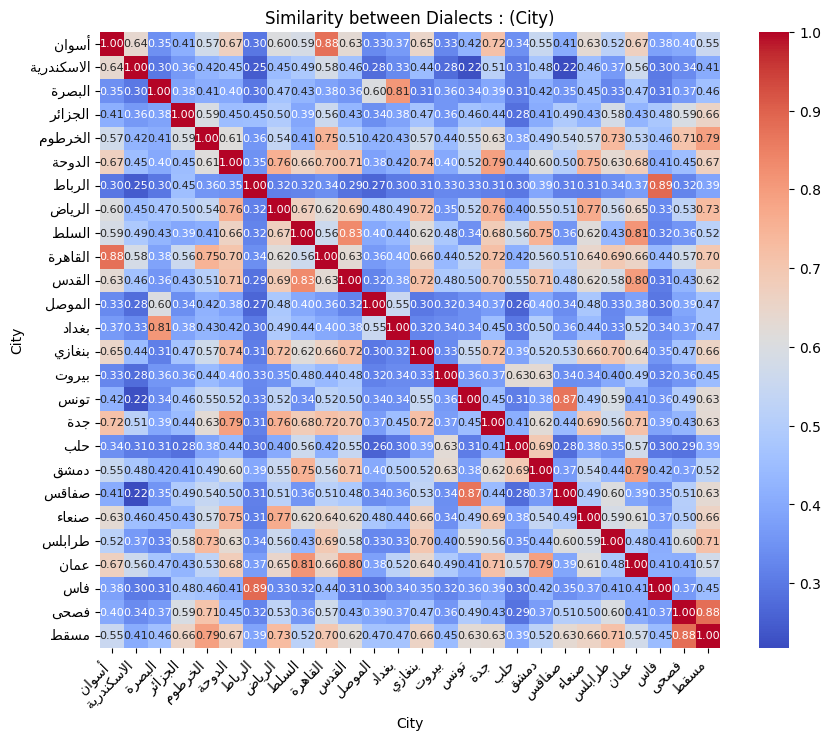

In [ ]:
calc_similarity(data_trian_df,"City",3)

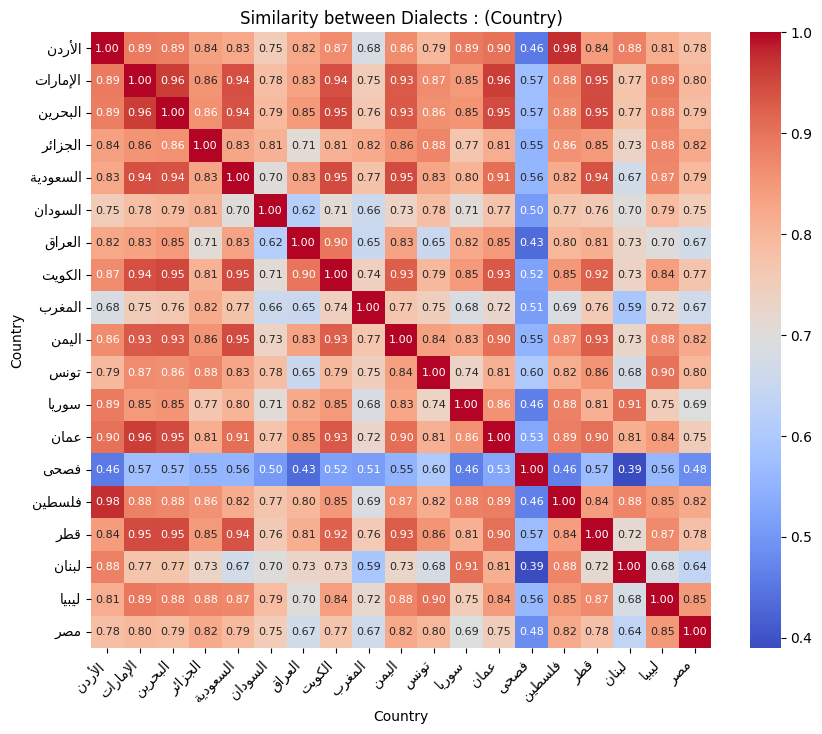

In [ ]:
calc_similarity(data_trian_df,"Country",20)

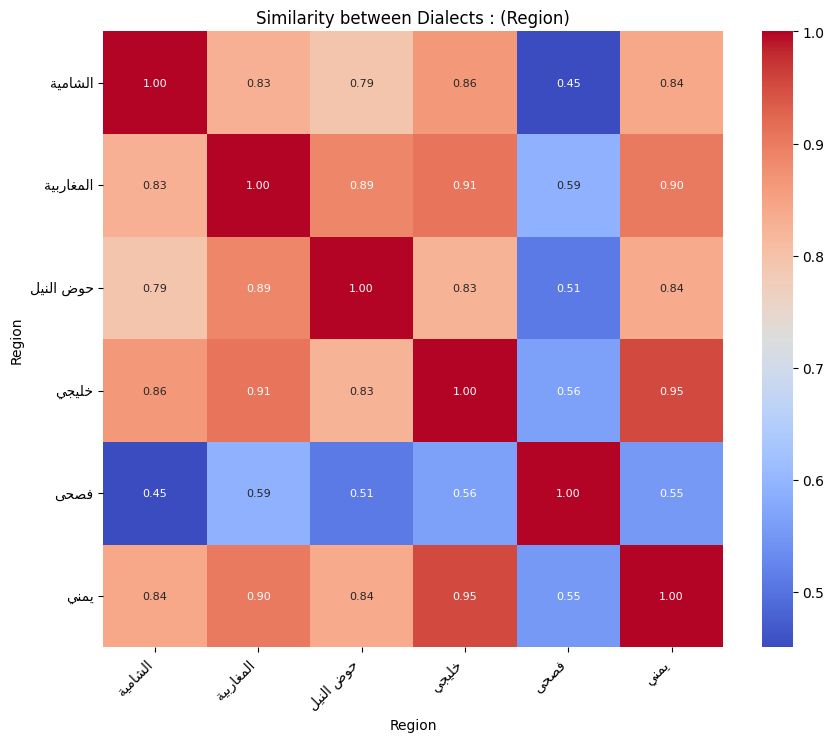

In [ ]:
calc_similarity(data_trian_df,"Region",20)

## [2.7]

In [ ]:
# !wget https://archive.org/download/arabic_corpus/vectors.txt.xz
# !xz -d vectors.txt.xz

In [ ]:
embeddings_index = {}
with open('vectors.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:pass


train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in embeddings_index:
        oov_words += 1
oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 474341
Total number of unique words in training data: 739865
OOV rate: 64.11%


In [ ]:
import fasttext

model_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz"
model_filename = "cc.ar.300.bin"

import os
if not os.path.exists(model_filename):
    print("Downloading the FastText model...")
    !wget {model_url}
    !gunzip cc.ar.300.bin.gz
    print("Model downloaded successfully.")
else:
  print("Model already exists.")


Model already exists.


In [ ]:
ft_model = fasttext.load_model(model_filename)
train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)
model_vocab = set(ft_model.words)
oov_words = 0
for word in unique_train_words:
    if word not in  model_vocab:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 466774
Total number of unique words in training data: 739865
OOV rate: 63.09%


In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

In [ ]:
model_aravec = gensim.models.Word2Vec.load("full_uni_cbow_300_twitter.mdl")

train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in model_aravec.wv:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words (AraVec): {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate (AraVec): {oov_rate:.2f}%")

Number of OOV words (AraVec): 455129
Total number of unique words in training data: 739865
OOV rate (AraVec): 61.52%


# ŸÖŸáŸÖÿ© 03 : ÿ™ŸÜÿ∏ŸäŸÅ Ÿàÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÜÿµ

normalization and cleaning Text

## [3.1]


In [17]:
def remove_link(text):
     return re.sub(r'http\S+|www\.\S+', '', text)
def remove_hashtag(text):
     return re.sub(r'#\w+', '', text)
def remove_tag(text):
     return re.sub(r'@\w+', '', text)
def remove_foreign_word(text):
     return re.sub(r'[a-zA-z]+', '', text)
def remove_punctuation(text):
     punctuation = r'[ÿüÿåÿõ!‚Ä¶ÿ°\"ŸÄ\'\(\)\{\}\[\]\|\:\;\<\>\ÿå\.\/\~\-\=\+\*\&\^\$#@\%\`]'
     return re.sub(r"(?<=\w)(" + punctuation + r")|(" + punctuation + r")(?=\w)|(" + punctuation + r")+|(" + punctuation + r")", ' ', text)
def remove_numbers(text):
     return re.sub(r'[0-9\u0660-\u0669]', '', text)
def remove_symbols(text):
     # ÿ•ÿ≤ÿßŸÑÿ© ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ŸÖŸàÿ≤ ÿ∫Ÿäÿ± ÿßŸÑŸÜÿµŸäÿ© (ÿπÿØÿß ÿßŸÑÿ≠ÿ±ŸàŸÅ ŸàÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™)
     return re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
def remove_diacritics(text):
     # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ™ÿ¥ŸÉŸäŸÑ ŸÖŸÜ ÿßŸÑŸÜÿµ ÿßŸÑÿπÿ±ÿ®Ÿä
     return re.sub(r'[\u064B-\u065F\u0670]', '', text)
def remove_repeated_characters(text):
     return re.sub(r'(.)\1+', r'\1', text)
def remove_stop_words(text):
     stop_words = [ 'ŸÅŸä', 'ŸÖŸÜ', 'ÿπŸÑŸâ', 'ÿ•ŸÑŸâ', 'ÿ£ŸÜ', 'ÿπŸÜ', 'ŸÉÿßŸÜ', 'ŸÉÿßŸÜÿ™', 'ŸáŸà', 'ŸáŸä', 'Ÿáÿ∞ÿß', 'Ÿáÿ∞Ÿá', 'ÿ∞ŸÑŸÉ', 'ÿ™ŸÑŸÉ', 'ŸÖÿß', 'ŸÖÿßÿ∞ÿß' ]
     pattern = r'\b(' + '|'.join(stop_words) + r')\b'
     return re.sub(pattern, '', text)
def remove_extra_spaces(text):
     return re.sub(r'\s+', ' ', text).strip()

def apply_and_print(df, func,name,column_name):
  df[name] = df[column_name].apply(func)
  return df.head()


In [ ]:
testing_df=pd.DataFrame(data_trian_df['sent'])

In [ ]:
apply_and_print(testing_df, remove_link,"remove_link", 'sent')
apply_and_print(testing_df, remove_hashtag,"remove_hashtag", 'sent')
apply_and_print(testing_df, remove_tag,"remove_tag", 'sent')
apply_and_print(testing_df, remove_punctuation, "remove_punctuation",'sent')
apply_and_print(testing_df, remove_numbers,"remove_numbers", 'sent')
apply_and_print(testing_df, remove_symbols,"remove_symbols", 'sent')
apply_and_print(testing_df, remove_foreign_word,"remove_foreign_word", 'sent')
apply_and_print(testing_df, remove_diacritics, "remove_diacritics",'sent')
apply_and_print(testing_df, remove_repeated_characters,"remove_repeated_characters", 'sent')
apply_and_print(testing_df, remove_stop_words,"remove_stop_words", 'sent')
apply_and_print(testing_df, remove_extra_spaces,"remove_extra_spaces", 'sent')

sent  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                                     remove_link  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                                  remove_hashtag  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                                      remove_tag  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                              remove_punctuation  \
3   ÿ±ÿßŸá ÿ™ŸÖÿß  ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑    
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß    
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©    
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±    
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉ    

                                  remove_numbers  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                                 remove_symbols  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©   
14                         ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                           ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                             remove_foreign_word  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                               remove_diacritics  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü   

                      remove_repeated_characters  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑ

## [3.2]

In [18]:
def normaliz_and_clean(text,func_list):
    for func in func_list:
        text=func(text)
    return text

## [3.3]

In [ ]:
func_list=[remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_symbols,remove_foreign_word,remove_numbers,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces]
data_trian_df["normalize_sent"]=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
data_trian_df.head(10)

split  \
3   corpus-6-test-corpus-26-train   
4   corpus-6-test-corpus-26-train   
5   corpus-6-test-corpus-26-train   
14  corpus-6-test-corpus-26-train   
15  corpus-6-test-corpus-26-train   
17  corpus-6-test-corpus-26-train   
24  corpus-6-test-corpus-26-train   
32  corpus-6-test-corpus-26-train   
36  corpus-6-test-corpus-26-train   
41  corpus-6-test-corpus-26-train   

                                            sent     Region Country    City  \
3   ÿ±ÿßŸá ÿ™ŸÖÿßÿå ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
4                ŸÖÿß ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
5                     ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
14                          ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
15                            ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
17                 ŸÖÿπ ÿßŸÑŸÇŸÜÿ™ ÿßŸÑÿ™ÿßŸÑÿ™ ÿØŸàÿ± ÿπŸÑŸâ ŸÑŸäÿ≥ÿ±.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
24      Ÿàÿßÿ¥ ÿ™ÿ®ÿ∫Ÿä ŸÑÿßŸÉÿ±ŸäŸÖ Ÿà ÿßŸÑÿ≥ŸÉÿ± ŸÅŸä ÿßŸÑŸÇŸáŸàÿ© ÿØŸäÿßŸÑŸÉÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
32       ÿ™ŸÇÿØÿ± ÿ™ÿÆŸÑÿµ ÿßŸÑÿ¥ŸäŸÉ ÿØŸäÿßŸÑŸä ÿØŸäÿßŸÑ ŸÖŸäÿ™ŸäŸÜ ÿØŸàŸÑÿßÿ±ÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
36                   ÿ•ŸÑÿß ÿÆÿµŸà Ÿäÿ®ÿßŸÜÿå ÿπŸäÿ∑ ŸÑŸäÿß ÿπŸÅÿßŸÉ.  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   
41                                   ŸÅŸäŸÜ ÿßŸÑŸÇŸáŸàÿ©ÿü  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©  ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿßŸÑÿ±ÿ®ÿßÿ∑   

                                               tokens  \
3   [ÿ±ÿßŸá, ÿ™ŸÖÿß, ÿå, ŸÖŸÇÿßÿ®ŸÑ, ŸÖŸÉÿ™ÿ®, ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™, ÿßŸÑÿ≥Ÿäÿßÿ≠, ...   
4            [ŸÖÿß, ÿπŸÖÿ±Ÿä, ÿ≥ŸÖÿπÿ™, ŸáÿßÿØ, ÿßŸÑÿπŸÜŸàÿßŸÜ, ŸáŸÜÿßŸäÿß, .]   
5                  [ÿ≥Ÿäÿ±, ŸÜŸäÿ¥ÿßŸÜ, ÿ≠ÿ™ÿß, ÿ™ÿ¥ŸàŸÅ, ÿµŸäÿØŸÑŸäÿ©, .]   
14                        [ÿ¥ÿ≠ÿßŸÑ, ŸÉÿß, ŸäÿØŸäÿ±, ÿßŸÑŸÅÿ∑Ÿàÿ±, ÿü]   
15                           [ŸÉŸäŸÅÿßÿ¥, ŸÜŸÇÿØÿ±, ŸÜÿπÿßŸàŸÜŸÉ, ÿü]   
17             [ŸÖÿπ, ÿßŸÑŸÇŸÜÿ™, ÿßŸÑÿ™ÿßŸÑÿ™, ÿØŸàÿ±, ÿπŸÑŸâ, ŸÑŸäÿ≥ÿ±, .]   
24  [Ÿàÿßÿ¥, ÿ™ÿ®ÿ∫Ÿä, ŸÑÿßŸÉÿ±ŸäŸÖ, Ÿà, ÿßŸÑÿ≥ŸÉÿ±, ŸÅŸä, ÿßŸÑŸÇŸáŸàÿ©, ÿØŸäÿßŸÑ...   
32  [ÿ™ŸÇÿØÿ±, ÿ™ÿÆŸÑÿµ, ÿßŸÑÿ¥ŸäŸÉ, ÿØŸäÿßŸÑŸä, ÿØŸäÿßŸÑ, ŸÖŸäÿ™ŸäŸÜ, ÿØŸàŸÑÿßÿ±, ÿü]   
36             [ÿ•ŸÑÿß, ÿÆÿµŸà, Ÿäÿ®ÿßŸÜ, ÿå, ÿπŸäÿ∑, ŸÑŸäÿß, ÿπŸÅÿßŸÉ, .]   
41                                   [ŸÅŸäŸÜ, ÿßŸÑŸÇŸáŸàÿ©, ÿü]   

                                normalize_sent  
3   ÿ±ÿßŸá ÿ™ŸÖÿß ŸÖŸÇÿßÿ®ŸÑ ŸÖŸÉÿ™ÿ® ÿßÿ≥ÿ™ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑  
4                  ÿπŸÖÿ±Ÿä ÿ≥ŸÖÿπÿ™ ŸáÿßÿØ ÿßŸÑÿπŸÜŸàÿßŸÜ ŸáŸÜÿßŸäÿß  
5                    ÿ≥Ÿäÿ± ŸÜŸäÿ¥ÿßŸÜ ÿ≠ÿ™ÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©  
14                         ÿ¥ÿ≠ÿßŸÑ ŸÉÿß ŸäÿØŸäÿ± ÿßŸÑŸÅÿ∑Ÿàÿ±  
15                           ŸÉŸäŸÅÿßÿ¥ ŸÜŸÇÿØÿ± ŸÜÿπÿßŸàŸÜŸÉ  
17                    ŸÖÿπ ÿßŸÑŸÇŸÜÿ™ ÿßŸÑÿ™ÿßŸÑÿ™ ÿØŸàÿ± ŸÑŸäÿ≥ÿ±  
24        Ÿàÿßÿ¥ ÿ™ÿ®ÿ∫Ÿä ŸÑÿßŸÉÿ±ŸäŸÖ Ÿà ÿßŸÑÿ≥ŸÉÿ± ÿßŸÑŸÇŸáŸàÿ© ÿØŸäÿßŸÑŸÉ  
32      ÿ™ŸÇÿØÿ± ÿ™ÿÆŸÑÿµ ÿßŸÑÿ¥ŸäŸÉ ÿØŸäÿßŸÑŸä ÿØŸäÿßŸÑ ŸÖŸäÿ™ŸäŸÜ ÿØŸàŸÑÿßÿ±  
36                   ÿ•ŸÑÿß ÿÆÿµŸà Ÿäÿ®ÿßŸÜ ÿπŸäÿ∑ ŸÑŸäÿß ÿπŸÅÿßŸÉ  
41                                  ŸÅŸäŸÜ ÿßŸÑŸÇŸáŸàÿ©

In [ ]:
d= data_trian_df['normalize_sent'].apply(tokenize)
tokens = [token for tokens_list in d for token in tokens_list]
total_tokens_normalize = len(tokens)
unique_tokens_normalize = len(set(tokens))
print(f"nomber of total tokens  (before) : {total_tokens} , (after) : {total_tokens_normalize}")
print(f"nomber of unique tokens  (before) : {unique_tokens} , (after) : {unique_tokens_normalize}")

nomber of total tokens  (before) : 8466370 , (after) : 5908395
nomber of unique tokens  (before) : 739865 , (after) : 450276


## [3.4]

In [ ]:
short_or_empty_rows = data_trian_df[data_trian_df['normalize_sent'].str.len() < 5]
num_short_or_empty = len(short_or_empty_rows)
print(f"\nÿπÿØÿØ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑÿ™Ÿä ÿ£ÿµÿ®ÿ≠ÿ™ ŸÅÿßÿ±ÿ∫ÿ© ÿ£Ÿà ŸÖŸÉŸàŸÜÿ© ŸÖŸÜ ÿ£ŸÇŸÑ ŸÖŸÜ 5 ŸÖÿ≠ÿßÿ±ŸÅ: {num_short_or_empty}")
# short_or_empty_rows
df = data_trian_df[data_trian_df['normalize_sent'].str.len() >= 5]
print(f"\nÿ™ŸÖ ÿ≠ÿ∞ŸÅ {num_short_or_empty} ÿ£ÿ≥ÿ∑ÿ±.")



ÿπÿØÿØ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑÿ™Ÿä ÿ£ÿµÿ®ÿ≠ÿ™ ŸÅÿßÿ±ÿ∫ÿ© ÿ£Ÿà ŸÖŸÉŸàŸÜÿ© ŸÖŸÜ ÿ£ŸÇŸÑ ŸÖŸÜ 5 ŸÖÿ≠ÿßÿ±ŸÅ: 1459

ÿ™ŸÖ ÿ≠ÿ∞ŸÅ 1459 ÿ£ÿ≥ÿ∑ÿ±.


# ŸÖŸáŸÖÿ© 04  : ÿ®ŸÜÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿ±ÿ¨ÿπŸä

Model Baseline

In [19]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

In [20]:
final_table = {}

final_table['question_step_number'] = []
final_table['model_name'] = []
final_table['features'] = []
final_table['model_parameters'] = []
final_table['preprocessing_methods'] = []
final_table['accuracy'] = []
final_table['balance_accuracy'] = []

## [4.1]


In [21]:
X_trian=data_trian_df["sent"].to_list()
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"].to_list()
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"].to_list()
Y_valid=data_vaild_df["Country"].to_list()

## [4.2]

In [22]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
# X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)


MultinomialNB()

## [4.3]

In [23]:
def test_naive_bayes ( X_test_tfidf, Y_test):

    Y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(Y_test, Y_pred)
    f_score = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"f_score: {f_score}")
    return accuracy,f_score,report

def add_to_comparison_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy):
  comparison_table['question_step_number'].append(question_step_number)
  comparison_table['model_name'].append(model_name)
  comparison_table['features'].append(features)
  comparison_table['model_parameters'].append(model_parameters)
  comparison_table['preprocessing_methods'].append(preprocessing_methods)
  comparison_table['accuracy'].append(accuracy)
  comparison_table['balance_accuracy'].append(balanced_accuracy)


In [24]:
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)


Accuracy: 0.47986742824906564
f_score: 0.4444424386607807


In [25]:
add_to_comparison_table("4.3",'MultinomialNB','TF-IDF','default',"None",accuracy,balanced_accuracy)

## [4.4]

In [26]:
func_list=[remove_link]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove links",accuracy,balanced_accuracy)


Accuracy: 0.484451026020732
f_score: 0.4496916318990112


In [27]:
func_list=[remove_hashtag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove hashtag",accuracy,balanced_accuracy)

Accuracy: 0.47690571891968125
f_score: 0.44103133269729794


In [28]:
func_list=[remove_tag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove tag",accuracy,balanced_accuracy)

Accuracy: 0.4176715323319935
f_score: 0.3677214408392125


In [29]:
func_list=[remove_punctuation]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove punctuation",accuracy,balanced_accuracy)

Accuracy: 0.47634158380932234
f_score: 0.440303496031949


In [30]:
func_list=[remove_symbols]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove symbols",accuracy,balanced_accuracy)

Accuracy: 0.4801494958042451
f_score: 0.4449155516651825


In [31]:
func_list=[remove_repeated_characters]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove repeated_characters",accuracy,balanced_accuracy)

Accuracy: 0.45151963895352937
f_score: 0.4120061024569299


In [32]:
func_list=[remove_numbers]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove numbers",accuracy,balanced_accuracy)

Accuracy: 0.4525068753966575
f_score: 0.41164913991608626


In [33]:
func_list=[remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove extra spaces",accuracy,balanced_accuracy)

Accuracy: 0.47986742824906564
f_score: 0.4444424386607807


In [34]:
func_list=[remove_foreign_word]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove foreign word",accuracy,balanced_accuracy)

Accuracy: 0.4164727452224808
f_score: 0.36601758689192043


In [35]:
func_list=[remove_stop_words]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove stop words",accuracy,balanced_accuracy)

Accuracy: 0.48184190113532194
f_score: 0.44746157173022016


In [36]:
func_list=[remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove diacritics",accuracy,balanced_accuracy)

Accuracy: 0.47993794513786053
f_score: 0.44503317906180245


## [4.5]

In [37]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

In [38]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.5",'MultinomialNB','TF-IDF','default',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.4867075664621677
f_score: 0.4525644680271463


## [4.6]

In [39]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [40]:
vectorizer = TfidfVectorizer(max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5625122765664898
f_score: 0.5357980141462194


In [41]:
vectorizer = TfidfVectorizer(max_df=0.6)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.6',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5625122765664898
f_score: 0.5357980141462194


In [42]:
vectorizer = TfidfVectorizer(min_df=0.06)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF',',min_df=0.06',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.13789039481437831
f_score: 0.04039696179529227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
vectorizer = TfidfVectorizer(min_df=0.01)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.01',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.20570614810449814
f_score: 0.14717005434902966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2)',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5192005499901787
f_score: 0.49104869933338063


In [45]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,3)',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5044686702023178
f_score: 0.4756672643962105


In [46]:
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=20000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6049400903555293
f_score: 0.5928767010403333


In [47]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6391671577293263
f_score: 0.6244293503234895


In [48]:
vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=100000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6384305637399332
f_score: 0.6210098760227106


In [50]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2),max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.632095855431153
f_score: 0.6179286236543984


In [51]:
vectorizer = TfidfVectorizer(max_df=0.8,max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6391671577293263
f_score: 0.6244293503234895


In [52]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.05)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.05,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6483991357297191
f_score: 0.642293603923211


In [53]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.1max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.652867805932037
f_score: 0.645950917513301


In [54]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.653702612453349
f_score: 0.6430181324832508


In [56]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.8)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.8,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6454527597721469
f_score: 0.632275498492242


In [60]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)

Accuracy: 0.5856427614413652
f_score: 0.5743458554616943


In [58]:
final_table['question_step_number'].append("4.6")
final_table['model_name'].append('MultinomialNB')
final_table['features'].append('TF-IDF')
final_table['model_parameters'].append('alpha=0.5,max_features=50000')
final_table['preprocessing_methods'].append("remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces")
final_table['accuracy'].append(accuracy)
final_table['balance_accuracy'].append(balanced_accuracy)

# ŸÖŸáŸÖÿ© 05 : ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÖÿßÿ∞ÿ¨ ÿßŸÑÿ™ÿπŸÑŸÖ ÿßŸÑÿπŸÖŸäŸÇ

Deep learning

The Comparison Dictionary example

In [ ]:
# comparison_table = {}

# comparison_table['question_step_number'] = []
# comparison_table['model_name'] = []
# comparison_table['features'] = []
# comparison_table['model_parameters'] = []
# comparison_table['preprocessing_methods'] = []
# comparison_table['accuracy'] = []
# comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

NameError: name 'accuracy' is not defined

## [5.1]

In [ ]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Country"].to_list()


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid) # ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÅÿ≥ ÿßŸÑŸÖÿ¥ŸÅÿ± ŸÖŸÜ ÿ£ÿ¨ŸÑ ÿßŸÑÿ™ŸÜÿßÿ≥ŸÇ
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
input_dim = X_train_tfidf.shape[1]  # Ÿäÿ¨ÿ® ÿ£ŸÜ ŸäŸÉŸàŸÜ input_dim ŸáŸà ÿπÿØÿØ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (ÿ£ÿπŸÖÿØÿ© ŸÖÿµŸÅŸàŸÅÿ© TF-IDF)
num_classes = len(set(Y_trian))

input_layer = Input(shape=(input_dim,), sparse=True)  # ÿ™ÿπÿ±ŸäŸÅ ÿ∑ÿ®ŸÇÿ© ÿßŸÑŸÖÿØÿÆŸÑÿßÿ™

x = tf.keras.layers.Dense(128, activation='relu')(input_layer)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])
model.summary()

Model: "functional_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_4 (InputLayer)      ‚îÇ (None, 500000)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)                ‚îÇ (None, 128)            ‚îÇ    64,000,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_8 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_9 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_14 (Dense)                ‚îÇ (None, 19)             ‚îÇ         1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 64,009,619 (244.18 MB)

 Trainable params: 64,009,619 (244.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_tfidf, Y_trian_encoded, epochs=10, batch_size=32, validation_data=(X_valid_tfidf, Y_valid_encoded),verbose=True)

Epoch 1/10
 3050/16740 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2:01:47 534ms/step - accuracy: 0.2240 - loss: 2.5305

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_test_tfidf, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# add_to_comparison_table("5.1", 'Deep Neural Network', 'TF-IDF', 'default', "Your preprocessing steps", accuracy, balanced_accuracy_score(Y_test, np.argmax(model.predict(X_test_tfidf), axis=1)))

## [5.2]

### [5.2.1]

### [5.2.2]

### [5.2.3]

## [5.3]

## [5.4]

## [5.5]

## [5.6]

# ŸÖŸáŸÖÿ© 06 : ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑÿØÿßŸÑŸÑŸä

Semantic representation

## [6.1]

## [6.2]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)